# Stack Overflow Survey Analysis
https://github.com/bisman16/Stack_Overflow_Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)



In [3]:
df_survey = pd.read_csv(r'E:\bigdata\ai\StackOverflow\developer_survey_2020\survey_results_public.csv')
df_survey.head()


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [4]:
print("Stack Overflow 2020 调查数据包含 {} 人和 {} 个项目".format(df_survey.shape[0], df_survey.shape[1]))

Stack Overflow 2020 调查数据包含 64461 人和 61 个项目


In [5]:
df_survey.columns



Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [6]:
df_survey.describe()

# 可以看到 平均年龄30岁

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


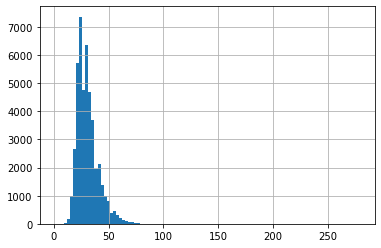

In [7]:
df_survey['Age'].hist(bins=100)

# 可以看到 年龄从1到279的都有，所以我们需要移除这些异常值


去除异常值的百分比: 6.427141992832876
小于18岁的人数: 1186


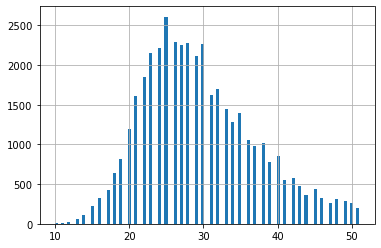

In [8]:
# ConvertedComp 年薪
df_survey_no_outlier = df_survey.copy()
for col in ['Age','ConvertedComp']:
    q1  = df_survey_no_outlier[col].quantile(0.25)
    q3  = df_survey_no_outlier[col].quantile(0.75)
    iqr = q3-q1
    df_survey_no_outlier = df_survey_no_outlier[~((df_survey_no_outlier[col] > (q3+1.5*iqr)) | (df_survey_no_outlier[col] < (q1-1.5*iqr)))]

print("去除异常值的百分比: {}".format(((len(df_survey) - len(df_survey_no_outlier))/len(df_survey))*100))

print("小于18岁的人数: {}".format(len(df_survey_no_outlier[df_survey_no_outlier['Age'] < 18])))

df_survey_no_outlier['Age'].hist(bins=100);

In [9]:
# 年龄在18岁以下的主要调查对象有哪些
df_survey_no_outlier[df_survey_no_outlier['Age'] < 18]['MainBranch'].value_counts(normalize=True)


I am a student who is learning to code                                           0.533446
I code primarily as a hobby                                                      0.386113
I am a developer by profession                                                   0.063506
I am not primarily a developer, but I write code sometimes as part of my work    0.015241
I used to be a developer by profession, but no longer am                         0.001693
Name: MainBranch, dtype: float64

In [10]:
# 年龄在18岁以下的文化程度
df_survey_no_outlier[df_survey_no_outlier['Age'] < 18]['EdLevel'].value_counts(normalize=True)


Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.546544
Primary/elementary school                                                             0.358525
Some college/university study without earning a degree                                0.051613
I never completed any formal education                                                0.022120
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.013825
Associate degree (A.A., A.S., etc.)                                                   0.005530
Professional degree (JD, MD, etc.)                                                    0.001843
Name: EdLevel, dtype: float64

In [11]:
# 年龄在18岁以下的受访者的主要国家/地区
df_survey_no_outlier[df_survey_no_outlier['Age'] < 18].groupby('Country')['Respondent'].count().sort_values(ascending=False).head(10)


Country
United States         247
India                  94
Germany                88
United Kingdom         83
Australia              39
Canada                 34
France                 33
Poland                 31
Russian Federation     30
Israel                 24
Name: Respondent, dtype: int64

In [12]:
# 分析周工作时间
# 样本个数以及周工作时间的平均数mean（也可以计算中位数median）
df_res_workhrs_40l = df_survey_no_outlier.groupby('Country').agg({'Respondent': 'count', 'WorkWeekHrs':'median'})
# 样本个数大于50 并且周工作时间<40小时的国家
df_res_workhrs_40l[(df_res_workhrs_40l['Respondent']>50) & (df_res_workhrs_40l['WorkWeekHrs']<40)].sort_values(by='WorkWeekHrs', ascending=True).head(10)

,Respondent,WorkWeekHrs
Country,,
Denmark,366,37.0
Finland,336,38.0
France,1798,39.0


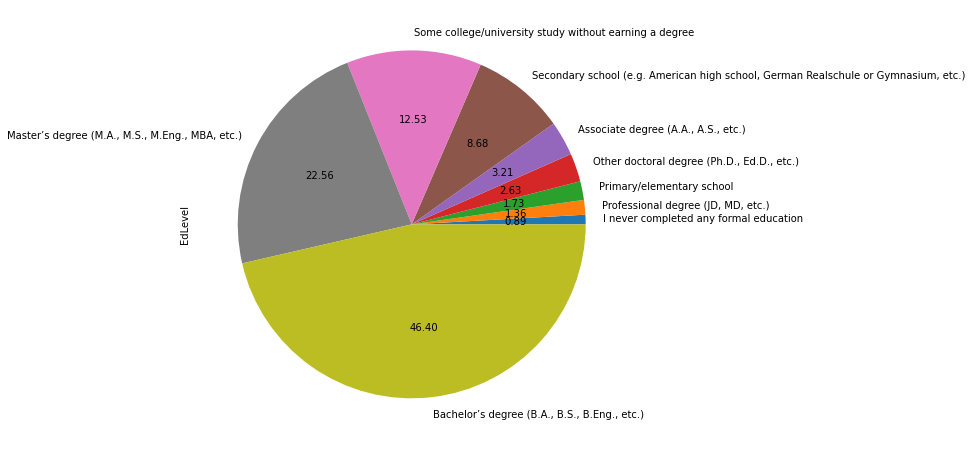

In [13]:
# 教育水平
df_ed = df_survey_no_outlier['EdLevel'].value_counts(normalize=True, ascending=True)
df_ed.plot(kind='pie', figsize=(8,8), autopct='%.2f')

In [20]:
df_res_workhrs_40l.T["China"]

Respondent     366.0
WorkWeekHrs     40.0
Name: China, dtype: float64

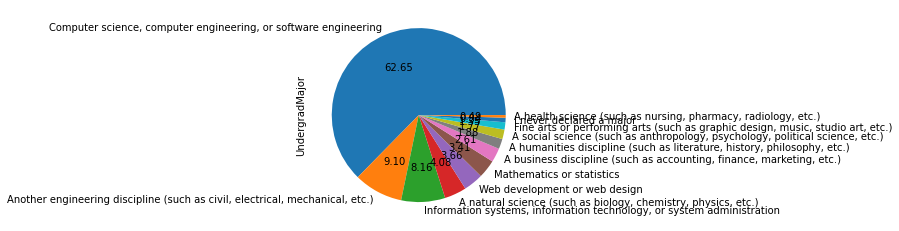

In [36]:
# 大学专业分析
df_um = df_survey_no_outlier['UndergradMajor'].value_counts(normalize=True, ascending=False)
df_um.plot(kind='pie', autopct='%.2f')

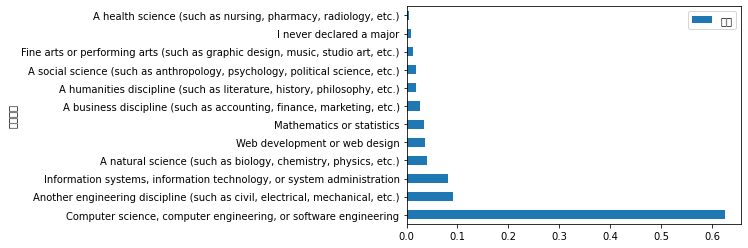

In [37]:
df_um.rename_axis('大学专业').reset_index(name='比例').plot(kind='barh', x='大学专业', y='比例')



In [38]:
# 语言，数据库和平台
df_survey_no_outlier['LanguageWorkedWith'].value_counts().head(20)

HTML/CSS;JavaScript;PHP;SQL                                    1021
HTML/CSS;JavaScript                                             863
C#;HTML/CSS;JavaScript;SQL                                      790
C#;HTML/CSS;JavaScript;SQL;TypeScript                           705
HTML/CSS;JavaScript;TypeScript                                  672
Python                                                          607
Java                                                            549
HTML/CSS;JavaScript;PHP                                         512
C#                                                              384
HTML/CSS;Java;JavaScript;SQL                                    371
JavaScript                                                      324
HTML/CSS;JavaScript;Python                                      324
Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;SQL;TypeScript     298
C#;SQL                                                          277
HTML/CSS;Java;JavaScript                        

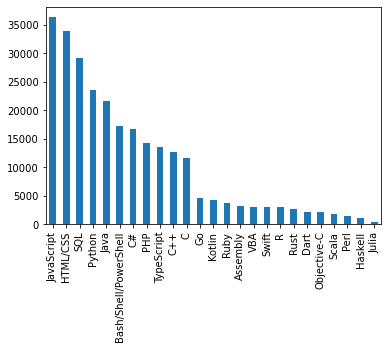

In [39]:
df_lg = df_survey_no_outlier.LanguageWorkedWith.str.split(';', expand=True).stack().value_counts()
df_lg.plot(kind='bar')


In [41]:
# get_dummies进行one-hot编码
df_languages = df_survey_no_outlier.LanguageWorkedWith.str.get_dummies(';')

df_languages

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,Objective-C,PHP,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64457,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
64458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64459,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# 把国家加上
df_languages_country = pd.concat([df_languages, df_survey_no_outlier['Country']], axis = 1)
df_languages_country



,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,Objective-C,PHP,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA,Country
0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Germany
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,United Kingdom
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,Russian Federation
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Albania
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,United States
64457,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Morocco
64458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Viet Nam
64459,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Poland


In [44]:
# 每个国家的统计人数
df_languages_country_respondents = df_languages_country.set_index('Country').groupby('Country').count().reset_index()
df_languages_country_respondents



,Country,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,Objective-C,PHP,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,Afghanistan,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
1,Albania,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
2,Algeria,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93
3,Andorra,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
4,Angola,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
5,Antigua and Barbuda,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
6,Argentina,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378
7,Armenia,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
8,Australia,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077
9,Austria,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513


In [45]:
# 计算每个国家的语言使用情况
df_languages_country_count = df_languages_country.set_index('Country').stack().reset_index().groupby(['Country','level_1']).sum().reset_index().rename(columns={"level_1": "Language", 0: "Count"}).reset_index()
df_languages_country_count


,index,Country,Language,Count
0,0,Afghanistan,Assembly,10
1,1,Afghanistan,Bash/Shell/PowerShell,10
2,2,Afghanistan,C,12
3,3,Afghanistan,C#,16
4,4,Afghanistan,C++,19
...,...,...,...,...
4570,4570,Zimbabwe,SQL,15
4571,4571,Zimbabwe,Scala,0
4572,4572,Zimbabwe,Swift,0
4573,4573,Zimbabwe,TypeScript,5


In [51]:
df_languages_r = df_languages_country_count.merge(df_languages_country_respondents, left_on='Country', right_on='Country')[['Country','Language','Count', 'Assembly']].\
    rename(columns={'Country':'Country','Language':'Language','Count':'Count', 'Assembly':'Respondent'}).\
    sort_values('Count', ascending = False).\
    groupby('Country').head(1)

df_languages_r.head(10)
# JavaScript非常流行，它是每个国家使用最多的语言。Respondent 统计人数

,Country,Language,Count,Respondent
4385,United States,JavaScript,6976,10501
1785,India,JavaScript,4404,8311
1485,Germany,JavaScript,2131,3683
4335,United Kingdom,JavaScript,2096,3370
760,Canada,JavaScript,1330,2028
585,Brazil,JavaScript,1137,1790
1385,France,JavaScript,1123,1798
2910,Netherlands,JavaScript,833,1260
210,Australia,JavaScript,716,1077
3285,Poland,JavaScript,699,1265


In [52]:
def count_and_plot(df, col):
    unique_items = {}
    df = df.dropna(subset=[col])
    for item_set in df[col].apply(lambda row: str(row).split(';')):
        for item in item_set:
            if item not in unique_items.keys():
                unique_items[item] = 1
            else:
                unique_items[item] += 1

    unique_items_count = pd.DataFrame.from_dict(unique_items, orient='index')
    unique_items_count.columns = ['Count']
    unique_items_count['Proportion'] = unique_items_count['Count']/np.sum(unique_items_count['Count'])
    unique_items_count.sort_values('Count', ascending=False, inplace=True)
    unique_items_count.plot(kind='bar', y='Proportion')

    return unique_items_count

,Count,Proportion
MySQL,26014,0.202559
PostgreSQL,16709,0.130105
Microsoft SQL Server,15037,0.117086
SQLite,14390,0.112048
MongoDB,12412,0.096646
Redis,8474,0.065983
MariaDB,7813,0.060836
Oracle,7605,0.059217
Firebase,6840,0.053260
Elasticsearch,6311,0.049141


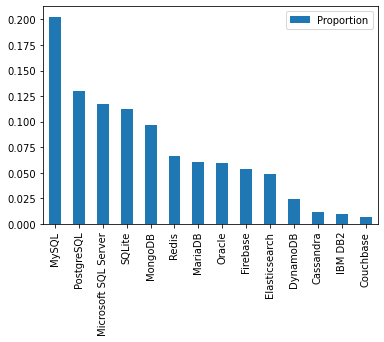

In [53]:
count_and_plot(df_survey_no_outlier, 'DatabaseWorkedWith')

,Count,Proportion
JavaScript,36337,0.135729
HTML/CSS,34007,0.127026
SQL,29151,0.108887
Python,23518,0.087846
Java,21679,0.080977
Bash/Shell/PowerShell,17267,0.064497
C#,16766,0.062626
PHP,14228,0.053146
TypeScript,13672,0.051069
C++,12686,0.047386


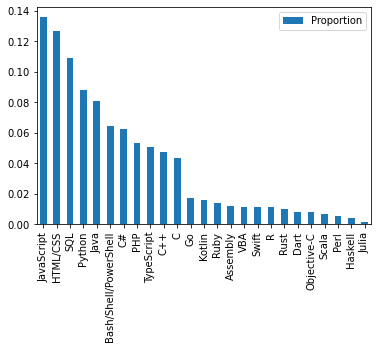

In [54]:
count_and_plot(df_survey_no_outlier, 'LanguageWorkedWith')

,Count,Proportion
Linux,27385,0.165271
Windows,26580,0.160412
Docker,17490,0.105553
Android,13337,0.080490
AWS,13238,0.079892
MacOS,11762,0.070985
Raspberry Pi,7327,0.044219
WordPress,7222,0.043585
Microsoft Azure,7170,0.043271
Google Cloud Platform,7009,0.042300


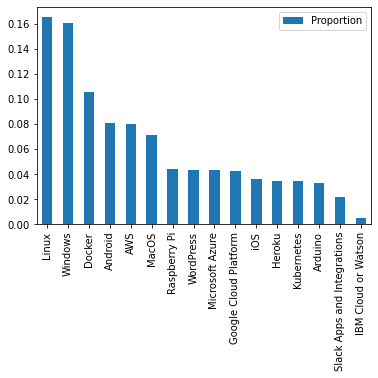

In [55]:
count_and_plot(df_survey_no_outlier, 'PlatformWorkedWith')



,Count,Proportion
Node.js,19497,0.232384
.NET,13010,0.155066
.NET Core,9952,0.118617
Pandas,5843,0.069642
React Native,4389,0.052312
TensorFlow,4348,0.051824
Unity 3D,4222,0.050322
Flutter,2781,0.033147
Ansible,2711,0.032312
Keras,2364,0.028176


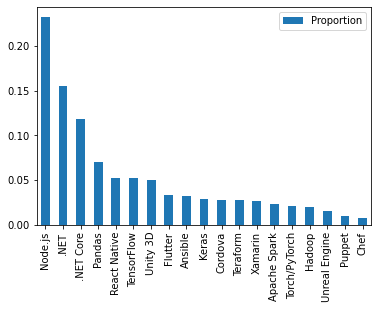

In [57]:
# 其他技术
count_and_plot(df_survey_no_outlier, 'MiscTechWorkedWith')


,Count,Proportion
jQuery,17266,0.157911
React.js,14248,0.130309
Angular,10018,0.091622
ASP.NET,8591,0.078571
Express,8520,0.077922
ASP.NET Core,7523,0.068804
Vue.js,6970,0.063746
Spring,6526,0.059685
Angular.js,6440,0.058899
Django,5728,0.052387


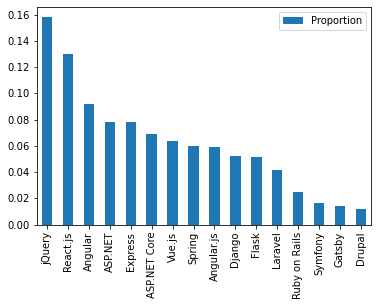

In [59]:
count_and_plot(df_survey_no_outlier, 'WebframeWorkedWith')



,Count,Proportion
React.js,19036,0.175379
Vue.js,12517,0.115319
Angular,10256,0.094489
ASP.NET Core,8411,0.077491
Django,7927,0.073032
jQuery,7900,0.072783
Express,7777,0.071650
Spring,5964,0.054946
Flask,5764,0.053104
Angular.js,5360,0.049382


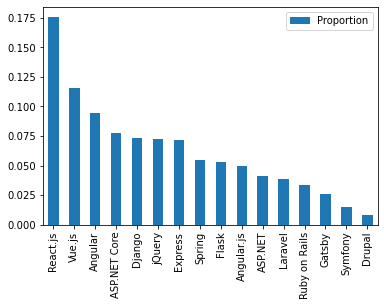

In [60]:
count_and_plot(df_survey_no_outlier, 'WebframeDesireNextYear')

